In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

plt.style.use(['Solarize_Light2', 'seaborn-talk'])

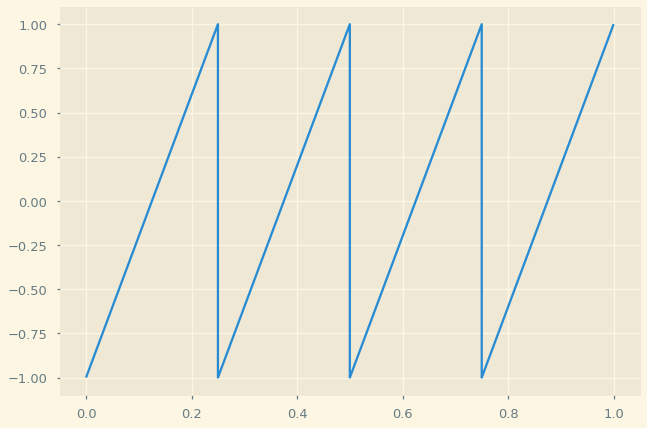

In [2]:
sr = 48000
Ts = 1/sr
t = np.arange(0,1,Ts)
f = 4

sig = signal.sawtooth(2*np.pi*f*t)
plt.plot(t, sig)

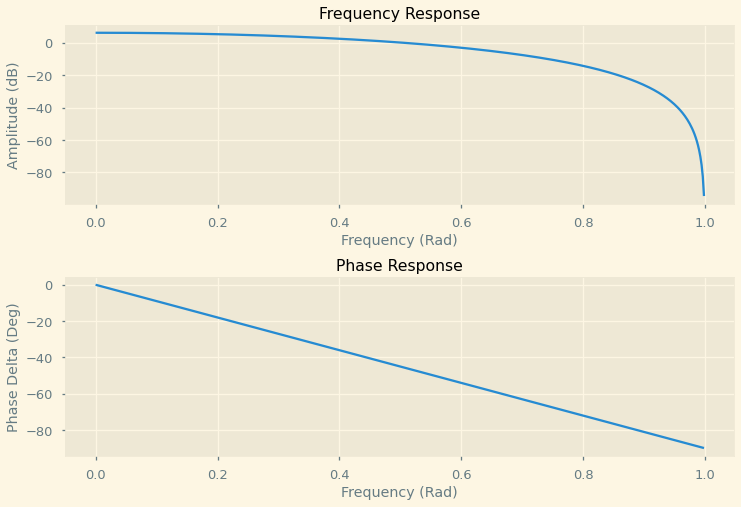

In [4]:
"""Here's how to use the freqz method. It doens't actually create a plot like Matlab, so BYO plots.
"""

b = np.array([1,1])
w, h = signal.freqz(b)

fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('Frequency Response')
ax1.set_xlabel('Frequency (Rad)')
ax1.set_ylabel('Amplitude (dB)')
ax1.plot(w/np.pi, 20 * np.log10(np.real(h)))

ax2.set_title('Phase Response')
ax2.set_xlabel('Frequency (Rad)')
ax2.set_ylabel('Phase Delta (Deg)')
angles = np.unwrap(np.angle(h,deg=True))
ax2.plot(w/np.pi, angles)

fig.tight_layout()
plt.show()

In [9]:
import signal_utils as util

ModuleNotFoundError: No module named 'signal_utils'

In [6]:
# Two definitions for fir_filter
# amt = amplitude of delayed signal, M = num samples of delay

# Basic Lowpass = M=1
# Basic Hipass = amt=-1., M=1
# Basic Band-Reject = amt=1., M=2
# Basic Bandpass = amt=-1., M=2

# More readable definition
def fir_filter(input, amt=1., M=1):
    N = len(input)
    output = np.zeros(N)
    for i in range(N):
        if i < M:
            output[i] = input[i]
        else:
            output[i] = input[i] + input[i-M] * amt
    return output

# Static buffer read index, shuffles buffer on each iteration
def alt_fir_filter(input, amt=1., M=1):
    N = len(input)
    output = np.zeros(N)
    buffer = np.zeros(N)
    for i in range(N):
        output[i] = input[i] + buffer[M-1] * amt
        buffer = np.concatenate([[input[i]],buffer[:-1]])
    return output

impulse = np.concatenate((np.array([1.0]), np.zeros(15)))

impulse_response = alt_fir_filter(impulse, amt=1., M=5)

util.show_freqz(impulse_response)

NameError: name 'util' is not defined

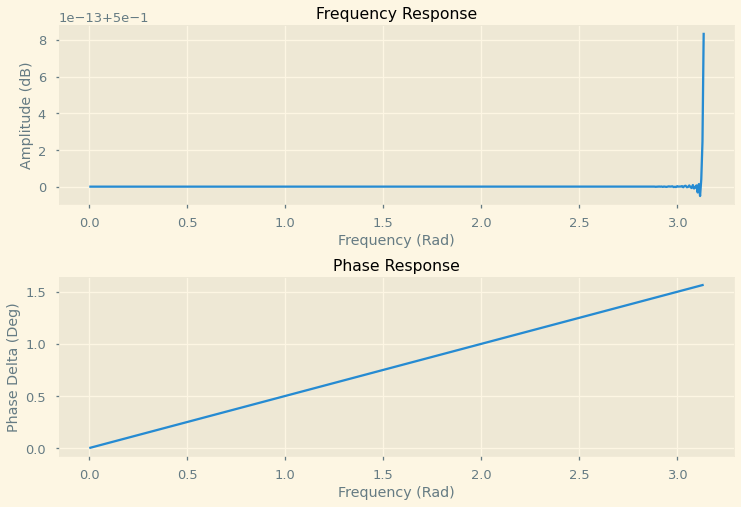

In [7]:
w, h = signal.freqz(1,[1,1])

fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('Frequency Response')
ax1.set_xlabel('Frequency (Rad)')
ax1.set_ylabel('Amplitude (dB)')
ax1.plot(w, np.real(h))

ax2.set_title('Phase Response')
ax2.set_xlabel('Frequency (Rad)')
ax2.set_ylabel('Phase Delta (Deg)')
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles)

fig.tight_layout()
plt.show()